# S. SHARAN

# TASK - 2 BEGINNER LEVEL 
# Stock Market Prediction And Forecasting Using Stacked LSTM

1. LOADING THE DATA SET

In [96]:
import pandas as pd
df = pd.read_csv('stock market prediction.csv')


In [97]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [98]:
df1 = df.reset_index() ['Close']

In [99]:
df1

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

# plotting close values in a graph

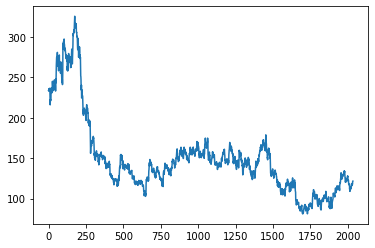

In [100]:
import matplotlib.pyplot as plt
plt.plot(df1)

# applying minmax scalar

In [101]:
import numpy as np
import sklearn

In [102]:
from sklearn.preprocessing import MinMaxScaler 

In [103]:
scaler=MinMaxScaler(feature_range=(0,1))

In [104]:
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [105]:
df1

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

# training and testing the dataset

In [106]:
train_size = int(len(df1)*0.6)
test_size = len(df1) - train_size 
train_data,test_data = df1[0:train_size,:],df1[train_size:len(df1),:1]

In [107]:
train_data,train_size

(array([[0.62418301],
        [0.62214052],
        [0.62622549],
        ...,
        [0.34517974],
        [0.31781046],
        [0.33047386]]),
 1221)

In [108]:
test_data,test_size

(array([[0.32128268],
        [0.34007353],
        [0.3310866 ],
        [0.31495098],
        [0.32066993],
        [0.32312092],
        [0.32352941],
        [0.30473856],
        [0.3057598 ],
        [0.30739379],
        [0.2943219 ],
        [0.30330882],
        [0.28125   ],
        [0.25694444],
        [0.26654412],
        [0.26552288],
        [0.26531863],
        [0.25408497],
        [0.26123366],
        [0.27798203],
        [0.28431373],
        [0.27246732],
        [0.27410131],
        [0.28227124],
        [0.29084967],
        [0.28513072],
        [0.28492647],
        [0.26838235],
        [0.26981209],
        [0.27062908],
        [0.25694444],
        [0.24754902],
        [0.2567402 ],
        [0.23713235],
        [0.23284314],
        [0.2250817 ],
        [0.24652778],
        [0.25776144],
        [0.26879085],
        [0.26674837],
        [0.24897876],
        [0.24489379],
        [0.24795752],
        [0.24305556],
        [0.27246732],
        [0

In [109]:

# conversion of training data and test data into a matrix
def create_dataset(dataset,time_step):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX) , np.array(dataY)

time_step = 100
X_train , y_train = create_dataset(train_data,time_step)
X_test , y_test = create_dataset(test_data,time_step)


In [110]:
X_test.shape

(713, 100)

In [111]:
X_train.shape

(1120, 100)

In [112]:
y_train.shape


(1120,)

In [113]:
y_test.shape

(713,)

# building a model

In [114]:
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [115]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

In [116]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_10 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


TRAINING THE DATA AND PREDICTING THE OUTPUT

In [117]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=40, batch_size=64)

Epoch 1/40
18/18 [==============================] - 9s 249ms/step - loss: 0.0465 - val_loss: 0.0026
Epoch 2/40
18/18 [==============================] - 4s 202ms/step - loss: 0.0060 - val_loss: 0.0013
Epoch 3/40
18/18 [==============================] - 4s 201ms/step - loss: 0.0025 - val_loss: 9.9826e-04
Epoch 4/40
18/18 [==============================] - 3s 197ms/step - loss: 0.0019 - val_loss: 0.0012
Epoch 5/40
18/18 [==============================] - 4s 209ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 6/40
18/18 [==============================] - 3s 188ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 7/40
18/18 [==============================] - 3s 186ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 8/40
18/18 [==============================] - 3s 195ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 9/40
18/18 [==============================] - 3s 191ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 10/40
18/18 [==============================] - 4s 208ms/step - loss: 0.0014 - val_loss: 0.

In [118]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [119]:
trans = model.predict(X_test[-1::]) 
output = scaler.inverse_transform(trans)
output

array([[120.45303]], dtype=float32)

In [120]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [121]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

169.8473328850427

In [122]:
math.sqrt(mean_squared_error(y_test, test_predict))

122.36104416441123

# Data visualization

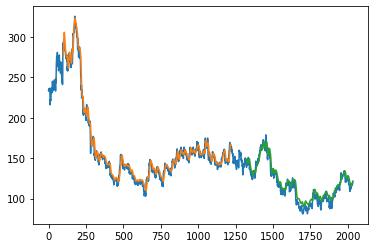

In [123]:
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back] = train_predict

testPredictPlot = np.empty_like(df1)
testPredictPlot[:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1] = test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [124]:
len(test_data)

814

In [125]:
x_input=test_data[714:].reshape(1,-1)
x_input.shape

(1, 100)

In [126]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.12479575163398693,
 0.1384803921568627,
 0.14011437908496732,
 0.1388888888888889,
 0.13541666666666663,
 0.14011437908496732,
 0.13807189542483655,
 0.130718954248366,
 0.130718954248366,
 0.12867647058823528,
 0.11846405228758167,
 0.14644607843137253,
 0.1480800653594771,
 0.159109477124183,
 0.15992647058823523,
 0.1578839869281045,
 0.16441993464052285,
 0.178921568627451,
 0.17933006535947704,
 0.19260620915032678,
 0.2081290849673203,
 0.18974673202614378,
 0.18055555555555558,
 0.1823937908496731,
 0.17708333333333326,
 0.17810457516339862,
 0.18055555555555558,
 0.17810457516339862,
 0.17851307189542487,
 0.196078431372549,
 0.18913398692810457,
 0.1895424836601307,
 0.19403594771241828,
 0.19444444444444442,
 0.20200163398692816,
 0.19771241830065356,
 0.19934640522875813,
 0.19873366013071891,
 0.19975490196078427,
 0.21282679738562094,
 0.21568627450980393,
 0.2044526143790849,
 0.21772875816993464,
 0.21098856209150318,
 0.21425653594771243,
 0.1975081699346406,
 0.1881

In [127]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.16555358]
101
1 day input [0.13848039 0.14011438 0.13888889 0.13541667 0.14011438 0.1380719
 0.13071895 0.13071895 0.12867647 0.11846405 0.14644608 0.14808007
 0.15910948 0.15992647 0.15788399 0.16441993 0.17892157 0.17933007
 0.19260621 0.20812908 0.18974673 0.18055556 0.18239379 0.17708333
 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399
 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641
 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876
 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536
 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961
 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412
 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562
 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268
 0.15196078 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745
 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967
 0.12806373 0.13031046 0.12724673 0

8 day output [[0.1818594]]
9 day input [0.12867647 0.11846405 0.14644608 0.14808007 0.15910948 0.15992647
 0.15788399 0.16441993 0.17892157 0.17933007 0.19260621 0.20812908
 0.18974673 0.18055556 0.18239379 0.17708333 0.17810458 0.18055556
 0.17810458 0.17851307 0.19607843 0.18913399 0.18954248 0.19403595
 0.19444444 0.20200163 0.19771242 0.19934641 0.19873366 0.1997549
 0.2128268  0.21568627 0.20445261 0.21772876 0.21098856 0.21425654
 0.19750817 0.18811275 0.17851307 0.17381536 0.16033497 0.16564542
 0.17116013 0.17422386 0.18035131 0.17401961 0.16278595 0.16973039
 0.17810458 0.17034314 0.16830065 0.17279412 0.17544935 0.18382353
 0.19138072 0.18913399 0.19097222 0.17238562 0.16830065 0.1693219
 0.17177288 0.16156046 0.14971405 0.1503268  0.15196078 0.14726307
 0.14501634 0.14603758 0.12479575 0.13112745 0.11397059 0.1190768
 0.12377451 0.13562092 0.12908497 0.13459967 0.12806373 0.13031046
 0.12724673 0.13521242 0.14522059 0.15257353 0.14848856 0.14338235
 0.14562908 0.15236928 0.1

16 day output [[0.19568397]]
17 day input [0.17892157 0.17933007 0.19260621 0.20812908 0.18974673 0.18055556
 0.18239379 0.17708333 0.17810458 0.18055556 0.17810458 0.17851307
 0.19607843 0.18913399 0.18954248 0.19403595 0.19444444 0.20200163
 0.19771242 0.19934641 0.19873366 0.1997549  0.2128268  0.21568627
 0.20445261 0.21772876 0.21098856 0.21425654 0.19750817 0.18811275
 0.17851307 0.17381536 0.16033497 0.16564542 0.17116013 0.17422386
 0.18035131 0.17401961 0.16278595 0.16973039 0.17810458 0.17034314
 0.16830065 0.17279412 0.17544935 0.18382353 0.19138072 0.18913399
 0.19097222 0.17238562 0.16830065 0.1693219  0.17177288 0.16156046
 0.14971405 0.1503268  0.15196078 0.14726307 0.14501634 0.14603758
 0.12479575 0.13112745 0.11397059 0.1190768  0.12377451 0.13562092
 0.12908497 0.13459967 0.12806373 0.13031046 0.12724673 0.13521242
 0.14522059 0.15257353 0.14848856 0.14338235 0.14562908 0.15236928
 0.15400327 0.14971405 0.1621732  0.16319444 0.16584967 0.16555358
 0.16775975 0.169942

24 day output [[0.20813912]]
25 day input [0.17810458 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399
 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641
 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876
 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536
 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961
 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412
 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562
 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268
 0.15196078 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745
 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967
 0.12806373 0.13031046 0.12724673 0.13521242 0.14522059 0.15257353
 0.14848856 0.14338235 0.14562908 0.15236928 0.15400327 0.14971405
 0.1621732  0.16319444 0.16584967 0.16555358 0.16775975 0.1699425
 0.1720725  0.17414016 0.17614637 0.17809701 0.17999914 0.1818594
 0.18368332 0.18547523 

In [128]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [129]:
import matplotlib.pyplot as plt
len(df1)

2035

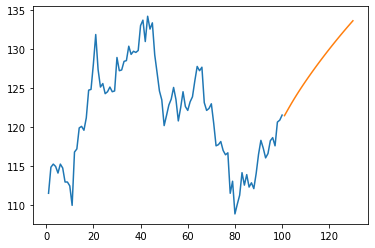

In [130]:
plt.plot(day_new,scaler.inverse_transform(df1[1935:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

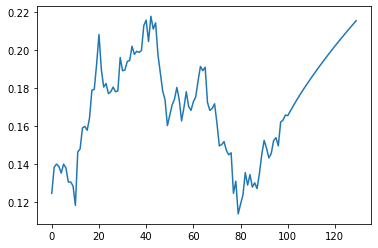

In [131]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1935:])

In [132]:
df3=scaler.inverse_transform(df3).tolist()

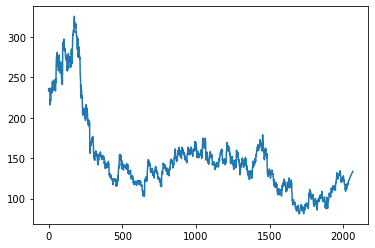

In [133]:
plt.plot(df3)